<a href="https://colab.research.google.com/github/grgrbu/ML-bioinf/blob/main/HW8_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import scipy
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
def read_data(path="/boston.csv"):
    if path == "/boston.csv":
      dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
      X = dataframe[:, :-1]
      y = dataframe[:, -1]
    elif path == "/cancer.csv":
      dataframe = np.genfromtxt(path, delimiter=",", skip_header=1)
      X = dataframe[:, 1:]
      y = dataframe[:, 0]
      df = pd.read_csv(path, sep=",",  header = 0, decimal ='.')
      y = df['label'].replace({'B':0, 'M':1})
      y = np.array(y)
    else:
      dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
      X = dataframe[:, :-1]
      y = dataframe[:, -1]
    return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
class NormalLR:
    def __init__(self):
        pass
        
    def fit(self, X, y):
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        return X @ self.weights

In [6]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [7]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.009082334435011342


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [8]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        m = X.shape[1]
        n = X.shape[0]
        self.weights = np.random.uniform(-0.1, 0.1, m + 1)
        Xx = np.c_[np.full(n, 1), X]
        for i in range(self.iterations):
            y_pred = np.dot(Xx, self.weights)
            num = 2 * self.alpha * np.dot(Xx.T, y-y_pred) - self.l * np.sign(self.weights)
            den = Xx.shape[0] * Xx.shape[1]
            self.weights += num / den 
            
    def predict(self, X):
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        return X @ self.weights

In [9]:
def build_plot(X_train, y_train, X_test, y_test, iterations=1000):
    l_f = np.arange(0, 0.2, 0.01)
    y = []
    for l in l_f:
        regr = GradientLR(0.1, iterations=iterations, l=l)
        regr.fit(X_train, y_train)
        y.append(mse(y_test, regr.predict(X_test)))
    plt.plot(l_f, y)
    plt.show()

In [10]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.009983623380924088


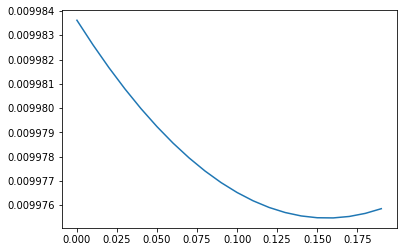

In [11]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

### Cancer

In [12]:
X, y = read_data("/cancer.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [13]:
scal = preprocessing.StandardScaler()
scal.fit(X_train)

X_train = scal.transform(X_train)
X_test = scal.transform(X_test)

In [14]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.05986875983440513


0.06111606855143497


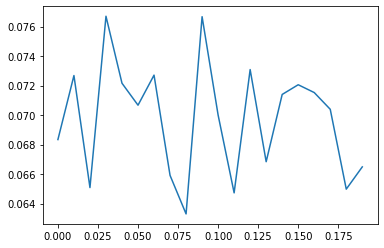

In [15]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

## Spam

In [16]:
X, y = read_data("/spam.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

In [17]:
scal = preprocessing.StandardScaler()
scal.fit(X_train)

X_train = scal.transform(X_train)
X_test = scal.transform(X_test)

In [18]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.189095845995502


0.1887002839492016


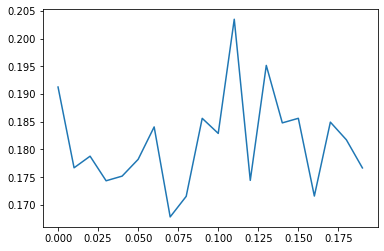

In [19]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)